# Image Extraction and Annotation using PyDicom

In [11]:

from AdjustBoundary import adjustContour
from helper import find_files, read_image, selectFrames, save_images
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pydicom
import os
import matplotlib
matplotlib.use('Qt5Agg')

image_files = find_files()
frNum = int(input('Enter frame number: '))
selectFrames(image_files, frNum-1, frNum)   # Show the selected frames of all the images
i = 0
crop = 30

while i < len(image_files):
    ctr = None
    name = image_files[i].split(".")[0]
    c_save = name + "_inx.txt"

    if os.path.isfile(c_save):           ctr = np.loadtxt(c_save)
    im = read_image(image_files[i], frNum)
    im = im[crop:-crop,crop:-crop]

    exit_mode = adjustContour(im, ctr, im.shape, crop, c_save)
    save_images(image_files[i], frNum)
    if exit_mode == 'exit':                 break
    if exit_mode == 'previous':             i = i - 1
    if exit_mode == 'next':                 i = i + 1
    if exit_mode == 'done':                 pass
    i += 1


Enter frame number: 1
True


# Thresholding the given Image

In [4]:
import cv2 

src = cv2.imread("save/IM_0013_1.jpg", cv2.IMREAD_GRAYSCALE); 
th, dst = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY); 
cv2.imwrite("opencv-threshold-example.jpg", dst); 

# # Thresholding with maxValue set to 128
# th, dst = cv2.threshold(src, 0, 128, cv2.THRESH_BINARY); 
# cv2.imwrite("opencv-thresh-binary-maxval.jpg", dst); 

# # Thresholding with threshold value set 127 
# th, dst = cv2.threshold(src,127,255, cv2.THRESH_BINARY); 
# cv2.imwrite("opencv-thresh-binary.jpg", dst); 

# # Thresholding using THRESH_BINARY_INV 
# th, dst = cv2.threshold(src,127,255, cv2.THRESH_BINARY_INV); 
# cv2.imwrite("opencv-thresh-binary-inv.jpg", dst); 

# # Thresholding using THRESH_TRUNC 
# th, dst = cv2.threshold(src,127,255, cv2.THRESH_TRUNC); 
# cv2.imwrite("opencv-thresh-trunc.jpg", dst); 

# # Thresholding using THRESH_TOZERO 
# th, dst = cv2.threshold(src,127,255, cv2.THRESH_TOZERO); 
# cv2.imwrite("opencv-thresh-tozero.jpg", dst); 

# # Thresholding using THRESH_TOZERO_INV 
# th, dst = cv2.threshold(src,127,255, cv2.THRESH_TOZERO_INV); 
# cv2.imwrite("opencv-thresh-to-zero-inv.jpg", dst); 


# Finding and Drawing the Contours based on thresholded Image

In [5]:
# detect the contours on the binary image using cv2.CHAIN_APPROX_NONE
contours, hierarchy = cv2.findContours(image=dst, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
                                     
# draw contours on the original image
image_copy = dst.copy()
cv2.drawContours(image=image_copy, contours=contours[9], contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
               
# see the results
cv2.imshow('None approximation', image_copy)
cv2.waitKey(0)
cv2.imwrite('contours_none_image1.jpg', image_copy)
cv2.destroyAllWindows()

In [6]:
src = cv2.imread("opencv-threshold-example.jpg")
cv2.drawContours(image=src, contours=contours[9], contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
cv2.imshow('None approximation', src)
cv2.waitKey(0)
cv2.imwrite('contours_none_image1.jpg', src)
cv2.destroyAllWindows()

# Functions for automating the Process

In [69]:
import operator
def cal_index(contours):
    area={}
    for i,x in enumerate(contours):
        area[i]=cv2.contourArea(x)
    desc_area=sorted(area.items(),key=operator.itemgetter(1),reverse=True)
    return desc_area[:6]

In [70]:
con=cal_index(contours)
con

[(1560, 151444.5),
 (2051, 17588.0),
 (279, 2956.5),
 (1806, 2905.5),
 (780, 2558.5),
 (1136, 2468.0)]

In [68]:
import cv2 
src = cv2.imread("save/IM_0008_1.jpg", cv2.IMREAD_GRAYSCALE); 
th, dst = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY); 
cv2.imwrite("opencv-threshold-example.jpg", dst);
contours, hierarchy = cv2.findContours(image=dst, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
image_copy = cv2.imread("opencv-threshold-example.jpg")
cv2.drawContours(image=image_copy, contours=contours[1806], contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
cv2.imshow('None approximation', image_copy)
cv2.waitKey(0)
cv2.imwrite('contours_none_image1.jpg', image_copy)
cv2.destroyAllWindows()

In [53]:
import cv2 
src = cv2.imread("save/IM_0008_1.jpg", cv2.IMREAD_GRAYSCALE); 
th, dst = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY); 
cv2.imwrite("opencv-threshold-example.jpg", dst);
contours, hierarchy = cv2.findContours(image=dst, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
image_copy = cv2.imread("opencv-threshold-example.jpg")
cv2.drawContours(image=image_copy, contours=contours[cal_index(contours)], contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
cv2.imshow('None approximation', image_copy)
cv2.waitKey(0)
cv2.imwrite('contours_none_image1.jpg', image_copy)
cv2.destroyAllWindows()

NameError: name 'cal_index' is not defined

In [3]:
def image_manipulation(src):
    cv2.imwrite("opencv-original-example.jpg",src)
    (th, dst) = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY); 
    cv2.imwrite("opencv-threshold-example.jpg", dst);
    contours, hierarchy = cv2.findContours(image=dst, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
    image_copy = cv2.imread("opencv-original-example.jpg")
    cv2.drawContours(image=image_copy, contours=contours[cal_index(contours)], contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
    cv2.imwrite('contours_none_image1.jpg', image_copy)
    return image_copy

In [4]:
import time
import cv2
cap=cv2.VideoCapture('mov-series-005.avi')
while(1):
    ret, frame = cap.read()  
    frame=cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
    frame=image_manipulation(frame)
    cv2.imshow('Original', frame) 
    time.sleep(0.05)
    key=cv2.waitKey(1)
    if key==27:
        break
cap.release()
cv2.destroyAllWindows()

{116: 86694.0, 176: 19440.0}
{158: 105928.5, 219: 2123.5}
{156: 105802.0, 223: 2123.5}
{153: 106112.0, 216: 2123.5}
{147: 107718.0, 218: 2123.5}
{143: 106241.0, 214: 2123.5}
{152: 106264.0, 209: 2123.5}
{155: 106089.0, 234: 2123.5}
{151: 105698.0, 235: 2123.5}
{146: 106214.0, 241: 2123.5}
{174: 105072.0, 278: 2123.5}
{166: 104584.5, 254: 2123.5}
{154: 104742.5, 244: 2123.5}
{104: 79653.5, 198: 24220.5}
{157: 109575.5, 209: 4329.0}
{182: 103025.0, 252: 2123.5}
{167: 104556.5, 259: 2123.5}
{169: 103840.0, 282: 2123.5}
{174: 103252.5, 273: 2123.5}
{168: 101337.0, 259: 2123.5}
{161: 102503.5, 278: 2123.5}
{168: 100694.5, 263: 2123.5}
{171: 99429.5, 287: 2123.5}
{158: 103543.5, 217: 2135.5}
{154: 100946.5, 264: 2123.5}
{164: 101857.5, 248: 2123.5}
{164: 103592.0, 278: 2123.5}
{175: 99083.5, 279: 2123.5}
{169: 96432.0, 249: 2123.5}
{158: 100935.0, 250: 2960.5}
{174: 96922.0, 277: 2123.5}
{191: 97303.5, 281: 2123.5}
{173: 95476.5, 286: 2123.5}
{164: 97049.0, 265: 2123.5}
{177: 97132.5, 263: 2

# Method:Mean Filter

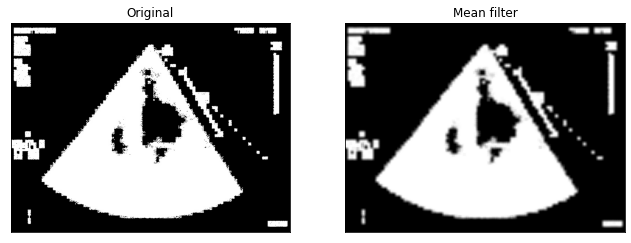

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image, ImageFilter
%matplotlib inline
image = cv2.imread('opencv-threshold-example.jpg') # reads the image
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) # convert to HSV
figure_size = 9 # the dimension of the x and y axis of the kernal.
new_image = cv2.blur(image,(figure_size, figure_size))
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_HSV2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_HSV2RGB)),plt.title('Mean filter')
plt.xticks([]), plt.yticks([])
plt.show()

In [1]:
import cv2 

src = cv2.imread("save/IM_0008_1.jpg"); 
src = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
src = cv2.blur(src,(2,2))
src=cv2.cvtColor(src, cv2.COLOR_HSV2RGB)
src=cv2.cvtColor(src, cv2.COLOR_RGB2GRAY)
th, dst = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY);

cv2.imwrite("opencv-threshold-example.jpg", dst);
contours, hierarchy = cv2.findContours(image=dst, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
image_copy = cv2.imread("opencv-threshold-example.jpg")
cv2.drawContours(image=image_copy, contours=contours[156], contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
cv2.imshow('None approximation', image_copy)
cv2.waitKey(0)
cv2.imwrite('contours_none_image1.jpg', image_copy)
cv2.destroyAllWindows()

# Centroid Calculation


In [61]:
import csv
def find_centroid(filepath):
    xes = []
    ys = []
    with open(filepath) as f:
         for line in f:
             x, y = map(float,line.split())
             xes.append(x)
             ys.append(y)
    x_cent=int(sum(xes)/len(xes))
    y_cent=int(sum(ys)/len(ys))
    print(x_cent*3.14)
    print(y_cent*3.22)
    return (int(x_cent*3.14),int(y_cent*3.22))


In [62]:
img=cv2.imread('save/IM_0008_1.jpg')
img = cv2.circle(img, find_centroid('data/IM_0008-01_inx.txt'), 5, (0,255,0), 10)
cv2.imshow('Nosdfs', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

417.62
247.94000000000003


In [10]:
import cv2
  
# function to display the coordinates of
# of the points clicked on the image
def click_event(event, x, y, flags, params):
 
    # checking for left mouse clicks
    if event == cv2.EVENT_LBUTTONDOWN:
 
        # displaying the coordinates
        # on the Shell
        print(x, ' ', y)
 
        # displaying the coordinates
        # on the image window
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img, str(x) + ',' +
                    str(y), (x,y), font,
                    1, (255, 0, 0), 2)
        cv2.imshow('image', img)
 
    # checking for right mouse clicks    
    if event==cv2.EVENT_RBUTTONDOWN:
 
        # displaying the coordinates
        # on the Shell
        print(x, ' ', y)
 
        # displaying the coordinates
        # on the image window
        font = cv2.FONT_HERSHEY_SIMPLEX
        b = img[y, x, 0]
        g = img[y, x, 1]
        r = img[y, x, 2]
        cv2.putText(img, str(b) + ',' +
                    str(g) + ',' + str(r),
                    (x,y), font, 1,
                    (255, 255, 0), 2)
        cv2.imshow('image', img)
 
# driver function
if __name__=="__main__":
 
    # reading the image
    img = cv2.imread('save/IM_0003_1.jpg', 1)
 
    # displaying the image
    cv2.imshow('image', img)
 
    # setting mouse handler for the image
    # and calling the click_event() function
    cv2.setMouseCallback('image', click_event)
 
    # wait for a key to be pressed to exit
    cv2.waitKey(0)
 
    # close the window
    cv2.destroyAllWindows()

396   327


In [ ]:
def centroid(c):
    xes = []
    ys = []
    for line in c:
        x, y = map(float,line.split())
        xes.append(x)
        ys.append(y)
    x_cent=int(sum(xes)/len(xes))
    y_cent=int(sum(ys)/len(ys))
    return (int(x_cent*3.14),int(y_cent*3.22))


In [72]:
def near_centroid(centroid,contours):
    a=[x for x in range(0,len(contours))]
    diff=100000000
    d=0
    for i,x in zip(a,contours):
        odd_i = []
        even_i = []
        st=x.reshape(-1)
        for i in range(0, len(st)):
            if i % 2:
                even_i.append(st[i])
            else :
                odd_i.append(x.reshape(-1)[i])
        xcord=sum(odd_i)/len(odd_i)    
        ycord=sum(even_i)/len(even_i)
        total=abs((xcord*3.12)-centroid[0])+abs((ycord*3.22)-centroid[1])
        #print(total)
        if total<diff:
            diff=total
            d=i
    return d
        
        

In [8]:
a=[x for x in range(0,len(contours))]
for i,cnt in zip(a,contours):
    print(contours,i)
    for x,y in cnt[i]:
        print(x,y)
    

(array([[[754, 583]]], dtype=int32), array([[[ 54, 574]],

       [[ 54, 575]],

       [[ 55, 574]]], dtype=int32), array([[[736, 568]],

       [[736, 569]],

       [[736, 570]],

       [[736, 571]],

       [[737, 571]],

       [[738, 571]],

       [[739, 571]],

       [[740, 572]],

       [[739, 573]],

       [[738, 573]],

       [[737, 574]],

       [[736, 573]],

       [[737, 574]],

       [[736, 575]],

       [[736, 576]],

       [[736, 577]],

       [[736, 578]],

       [[736, 579]],

       [[737, 579]],

       [[738, 580]],

       [[737, 581]],

       [[736, 581]],

       [[736, 582]],

       [[737, 583]],

       [[736, 582]],

       [[737, 581]],

       [[738, 581]],

       [[739, 580]],

       [[740, 581]],

       [[741, 582]],

       [[740, 583]],

       [[741, 582]],

       [[742, 583]],

       [[743, 582]],

       [[744, 583]],

       [[743, 582]],

       [[744, 581]],

       [[745, 580]],

       [[746, 580]],

       [[747, 581]],

   

(array([[[754, 583]]], dtype=int32), array([[[ 54, 574]],

       [[ 54, 575]],

       [[ 55, 574]]], dtype=int32), array([[[736, 568]],

       [[736, 569]],

       [[736, 570]],

       [[736, 571]],

       [[737, 571]],

       [[738, 571]],

       [[739, 571]],

       [[740, 572]],

       [[739, 573]],

       [[738, 573]],

       [[737, 574]],

       [[736, 573]],

       [[737, 574]],

       [[736, 575]],

       [[736, 576]],

       [[736, 577]],

       [[736, 578]],

       [[736, 579]],

       [[737, 579]],

       [[738, 580]],

       [[737, 581]],

       [[736, 581]],

       [[736, 582]],

       [[737, 583]],

       [[736, 582]],

       [[737, 581]],

       [[738, 581]],

       [[739, 580]],

       [[740, 581]],

       [[741, 582]],

       [[740, 583]],

       [[741, 582]],

       [[742, 583]],

       [[743, 582]],

       [[744, 583]],

       [[743, 582]],

       [[744, 581]],

       [[745, 580]],

       [[746, 580]],

       [[747, 581]],

   

(array([[[754, 583]]], dtype=int32), array([[[ 54, 574]],

       [[ 54, 575]],

       [[ 55, 574]]], dtype=int32), array([[[736, 568]],

       [[736, 569]],

       [[736, 570]],

       [[736, 571]],

       [[737, 571]],

       [[738, 571]],

       [[739, 571]],

       [[740, 572]],

       [[739, 573]],

       [[738, 573]],

       [[737, 574]],

       [[736, 573]],

       [[737, 574]],

       [[736, 575]],

       [[736, 576]],

       [[736, 577]],

       [[736, 578]],

       [[736, 579]],

       [[737, 579]],

       [[738, 580]],

       [[737, 581]],

       [[736, 581]],

       [[736, 582]],

       [[737, 583]],

       [[736, 582]],

       [[737, 581]],

       [[738, 581]],

       [[739, 580]],

       [[740, 581]],

       [[741, 582]],

       [[740, 583]],

       [[741, 582]],

       [[742, 583]],

       [[743, 582]],

       [[744, 583]],

       [[743, 582]],

       [[744, 581]],

       [[745, 580]],

       [[746, 580]],

       [[747, 581]],

   

(array([[[754, 583]]], dtype=int32), array([[[ 54, 574]],

       [[ 54, 575]],

       [[ 55, 574]]], dtype=int32), array([[[736, 568]],

       [[736, 569]],

       [[736, 570]],

       [[736, 571]],

       [[737, 571]],

       [[738, 571]],

       [[739, 571]],

       [[740, 572]],

       [[739, 573]],

       [[738, 573]],

       [[737, 574]],

       [[736, 573]],

       [[737, 574]],

       [[736, 575]],

       [[736, 576]],

       [[736, 577]],

       [[736, 578]],

       [[736, 579]],

       [[737, 579]],

       [[738, 580]],

       [[737, 581]],

       [[736, 581]],

       [[736, 582]],

       [[737, 583]],

       [[736, 582]],

       [[737, 581]],

       [[738, 581]],

       [[739, 580]],

       [[740, 581]],

       [[741, 582]],

       [[740, 583]],

       [[741, 582]],

       [[742, 583]],

       [[743, 582]],

       [[744, 583]],

       [[743, 582]],

       [[744, 581]],

       [[745, 580]],

       [[746, 580]],

       [[747, 581]],

   

(array([[[754, 583]]], dtype=int32), array([[[ 54, 574]],

       [[ 54, 575]],

       [[ 55, 574]]], dtype=int32), array([[[736, 568]],

       [[736, 569]],

       [[736, 570]],

       [[736, 571]],

       [[737, 571]],

       [[738, 571]],

       [[739, 571]],

       [[740, 572]],

       [[739, 573]],

       [[738, 573]],

       [[737, 574]],

       [[736, 573]],

       [[737, 574]],

       [[736, 575]],

       [[736, 576]],

       [[736, 577]],

       [[736, 578]],

       [[736, 579]],

       [[737, 579]],

       [[738, 580]],

       [[737, 581]],

       [[736, 581]],

       [[736, 582]],

       [[737, 583]],

       [[736, 582]],

       [[737, 581]],

       [[738, 581]],

       [[739, 580]],

       [[740, 581]],

       [[741, 582]],

       [[740, 583]],

       [[741, 582]],

       [[742, 583]],

       [[743, 582]],

       [[744, 583]],

       [[743, 582]],

       [[744, 581]],

       [[745, 580]],

       [[746, 580]],

       [[747, 581]],

   

IndexError: index 4 is out of bounds for axis 0 with size 4

In [73]:
print(near_centroid((418,248),contours))

1


In [20]:
contours[0].reshape(-1)

array([754, 583], dtype=int32)

In [79]:
contours[1].reshape(-1)

array([ 54, 574,  54, 575,  55, 574], dtype=int32)

In [80]:
odd_i = []
even_i = []
for i in range(0, len(contours[1].reshape(-1))):
    if i % 2:
        even_i.append(contours[1].reshape(-1)[i])
    else :
        odd_i.append(contours[1].reshape(-1)[i])
odd_i

[54, 54, 55]

In [81]:
sum(even_i)/len(even_i)

574.3333333333334

In [82]:
even_i

[574, 575, 574]

In [71]:
def cal_index(centroid,contours):
    diff=100000
    c=0
    a=[x for x in range(0,len(contours))]
    for x in contours:
        M = cv.moments(x)
        cx = int(M['m10']/M['m00'])
        cy = int(M['m01']/M['m00'])
        tot= np.sqrt((cx-centroid[0])**2+(cy-centroid[1]**2))
        if tot<diff:
            diff= tot
            c=i
    return c

In [72]:
cal_index((418,248),cont)

NameError: name 'cont' is not defined

In [8]:
import numpy as np